In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

model = load_model("C:/Users/sNutesh/Desktop/VT_Class/Major1.0/Model3.h5", compile=False)

Using TensorFlow backend.
W0423 11:27:24.437980  6644 deprecation.py:506] From C:\Users\sNutesh\Anaconda3\envs\class1\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0423 11:27:24.455754  6644 deprecation.py:506] From C:\Users\sNutesh\Anaconda3\envs\class1\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0423 11:27:24.466733  6644 deprecation.py:506] From C:\Users\sNutesh\Anaconda3\envs\class1\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init

In [2]:
test = pd.read_csv('test.csv')
print(test)

              id  label
0      blast (1)      1
1      blast (2)      1
2      blast (3)      1
3      blast (4)      1
4      blast (5)      1
5      blast (6)      1
6      blast (7)      1
7      blast (8)      1
8      blast (9)      1
9     blast (10)      1
10    blast (11)      1
11    blast (12)      1
12    blast (13)      1
13    blast (14)      1
14    blast (15)      1
15    blast (16)      1
16    blast (17)      1
17    blast (18)      1
18    blast (19)      1
19    blast (20)      1
20    blast (21)      1
21    blast (22)      1
22    blast (23)      1
23    blast (24)      1
24    blast (25)      1
25    blast (26)      1
26    blast (27)      1
27    blast (28)      1
28    blast (29)      1
29    blast (30)      1
..           ...    ...
270  healthy(21)      6
271  healthy(22)      6
272  healthy(23)      6
273  healthy(24)      6
274  healthy(25)      6
275  healthy(26)      6
276  healthy(27)      6
277  healthy(28)      6
278  healthy(29)      6
279  healthy(30)

In [3]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('Dataset/Testing/'+ test['id'][i] +'.jpg', grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test1 = np.array(test_image)

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 465.40it/s]


In [4]:
print(test1.shape)
y=test['label'].values
y = to_categorical(y)

(300, 256, 256, 1)


In [5]:
expected_classes = np.argmax(y,axis=1)
print(expected_classes)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6]


In [6]:
# predict probabilities for test set
yhat_probs = model.predict(test1, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(test1, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
# yhat_classes = yhat_classes[:, 0]

In [7]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [8]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(expected_classes, yhat_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.833333


In [9]:
# precision tp / (tp + fp)
precision = precision_score(expected_classes, yhat_classes, average=None)
print(precision)

[0.82142857 0.79545455 0.61428571 0.92592593 0.96153846 0.94230769]


In [10]:
# recall: tp / (tp + fn)
recall = recall_score(expected_classes, yhat_classes, average=None)
print(recall)

[0.46 0.7  0.86 1.   1.   0.98]


In [11]:
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(expected_classes, yhat_classes, average=None)
print(f1)

[0.58974359 0.74468085 0.71666667 0.96153846 0.98039216 0.96078431]


In [12]:
# confusion matrix
matrix = confusion_matrix(expected_classes, yhat_classes)
print(matrix)

[[23  7 17  2  0  1]
 [ 3 35 10  2  0  0]
 [ 1  2 43  0  2  2]
 [ 0  0  0 50  0  0]
 [ 0  0  0  0 50  0]
 [ 1  0  0  0  0 49]]


In [13]:
from sklearn.metrics import classification_report
target_names = ['Leaf Smut', 'Bacterial Blight', 'Brown Spot', 'Sheath Blight', 'Tungro', 'Healthy']
print(classification_report(expected_classes, yhat_classes, target_names=target_names))

                  precision    recall  f1-score   support

       Leaf Smut       0.82      0.46      0.59        50
Bacterial Blight       0.80      0.70      0.74        50
      Brown Spot       0.61      0.86      0.72        50
   Sheath Blight       0.93      1.00      0.96        50
          Tungro       0.96      1.00      0.98        50
         Healthy       0.94      0.98      0.96        50

        accuracy                           0.83       300
       macro avg       0.84      0.83      0.83       300
    weighted avg       0.84      0.83      0.83       300



In [14]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix \n',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, origin='lower')
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

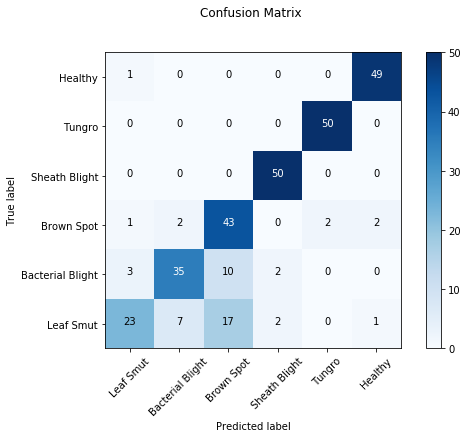

In [15]:
plot_confusion_matrix(cm           = matrix, 
                      normalize    = False,
                      target_names = target_names,
                      title        = "Confusion Matrix \n\n")

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [17]:
%matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from sklearn.metrics import roc_curve, auc

# mu1 = -2
# mu2 = 2
# variance = 1
# sigma = math.sqrt(variance)
# x1 = np.linspace(mu1 - 5*sigma, mu1 + 4*sigma, 100)
# x2 = np.linspace(mu2 - 5*sigma, mu2 + 4*sigma, 100)
# plt.plot(x1, stats.norm.pdf(x1, mu1, sigma)/1,color="green")
# plt.plot(x2, stats.norm.pdf(x2, mu2, sigma)/1,color="red")
# plt.axvline(x=-2,color="black")
# plt.axvline(x=0,color="black")
# plt.axvline(x=+2,color="black")
# plt.text(-2.7,0.55,"Sensative")
# plt.text(-0.7,0.55,"Balanced")
# plt.text(1.7,0.55,"Specific")
# plt.ylim([0,0.53])
# plt.xlim([-5,5])
# plt.legend(['Negative','Positive'])
# plt.yticks([])
# #plt.set_yticklabels([])
# plt.show()

def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

Using matplotlib backend: TkAgg


In [28]:
y = label_binarize(y, classes=[0,1, 2, 3, 4, 5, 6])
n_classes = y.shape[1]
y
yhat_probs

array([2.32767245e-08, 8.07621046e-14, 2.81191325e-22, 1.55079394e-10,
       1.41056583e-10, 1.14500986e-09, 2.06950881e-06, 5.60459578e-12,
       4.09493595e-07, 3.30983960e-12, 1.12833050e-18, 1.05568047e-19,
       3.04574703e-12, 2.38757247e-18, 1.28984113e-16, 4.01988928e-11,
       1.00757490e-27, 1.65164245e-17, 2.28778125e-11, 1.77840503e-11,
       7.56429207e-12, 1.58185902e-15, 2.45143598e-21, 9.65143730e-15,
       4.33928915e-25, 1.19012175e-10, 5.45703571e-09, 1.02611550e-13,
       9.99656697e-14, 6.09800025e-14, 6.02487393e-10, 5.60011618e-13,
       2.58667587e-10, 6.32022212e-11, 2.26785285e-10, 1.30225942e-06,
       1.68131808e-09, 7.39920403e-10, 4.51995913e-10, 4.37941701e-08,
       4.39441955e-11, 4.56922886e-19, 4.61549721e-19, 7.34451257e-15,
       1.72583906e-17, 1.45897194e-09, 5.28378102e-14, 1.63898775e-07,
       5.26235786e-14, 1.00194069e-27, 1.48269981e-12, 6.67337872e-15,
       1.71897501e-12, 3.91344249e-12, 2.67855398e-06, 5.81485692e-05,
      

In [29]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], yhat_probs[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

TypeError: Singleton array 2.3276725e-08 cannot be considered a valid collection.

In [23]:
plot_roc(yhat_probs,y)

ValueError: multilabel-indicator format is not supported